In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from pca import PCA

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist.data / 255., mnist.target

X = X.to_numpy()
y = y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(X_train.shape, X_test.shape)

(56000, 784) (14000, 784)


In [17]:
n_components_list = [1, 10, 50, 100]

In [18]:
X_train_pca: dict[int, np.ndarray] = {}
X_train_reconstructed: dict[int, np.ndarray] = {}
X_test_pca: dict[int, np.ndarray] = {}

In [19]:
for n_components in n_components_list:
    pca = PCA(n_components)
    pca.fit(X_train)

    X_train_pca[n_components] = pca.transform(X_train)
    X_train_reconstructed[n_components] = pca.inverse_transform(X_train_pca[n_components])

    X_test_pca[n_components] = pca.transform(X_test)

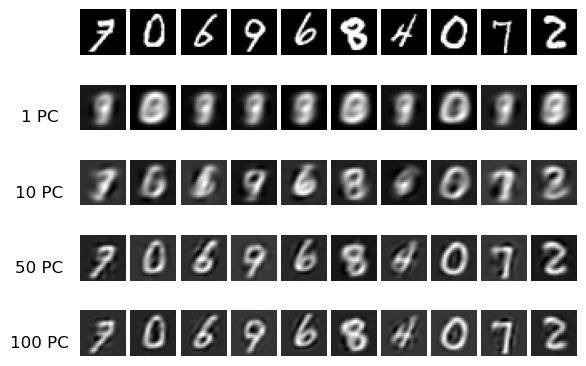

In [37]:
fig, axes = plt.subplots(len(n_components_list) + 1, 10)
for i in range(10):
    axes[0, i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')

    for j, n_components in enumerate(n_components_list):
        axes[j + 1, i].imshow(X_train_reconstructed[n_components][i].reshape(28, 28), cmap='gray')
        axes[j + 1, i].axis('off')
        
        if i == 0:
            axes[j + 1, i].set_title(f'{n_components} PC', rotation='horizontal', x=-.9, y=0)
            
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()